In [1]:
print ("UNAD")
print ("Jhon_James_Avila_Rubiano") 
print ("Tarea 3 - Algoritmos de Aprendizaje Supervisado")
print ("Regresion logistica")


UNAD
Jhon_James_Avila_Rubiano
Tarea 3 - Algoritmos de Aprendizaje Supervisado
Regresion logistica


In [3]:
#cargando librerias
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#lectura de datos en python y lo cargamos en la variable datos
datos= pd.read_csv('C:/Users/jjhon/Downloads/heart_cleveland_upload.csv')

In [7]:
#lectura de datos para analisis exploratorio
datos.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
#descripcion de los datos 
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

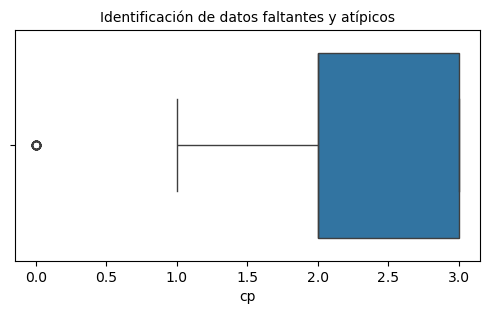

In [13]:
#identificacion datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['cp'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

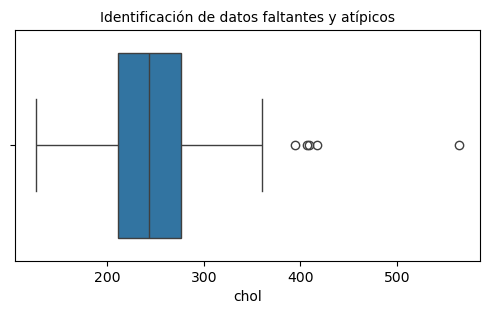

In [15]:
#identificacion datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['chol'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

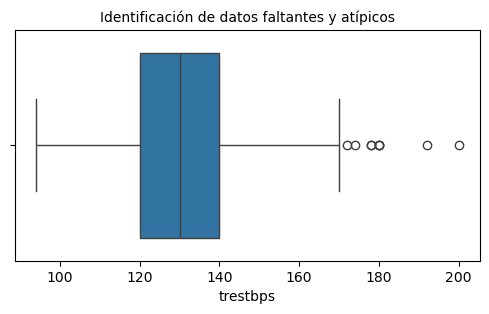

In [17]:
#identificacion datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['trestbps'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

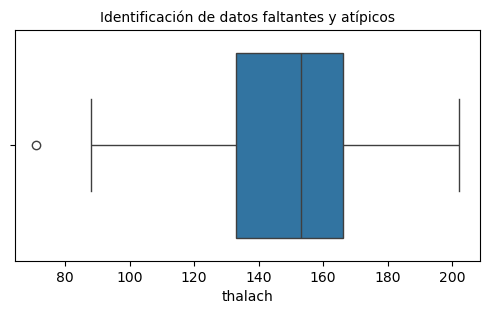

In [23]:
#identificacion datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['thalach'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

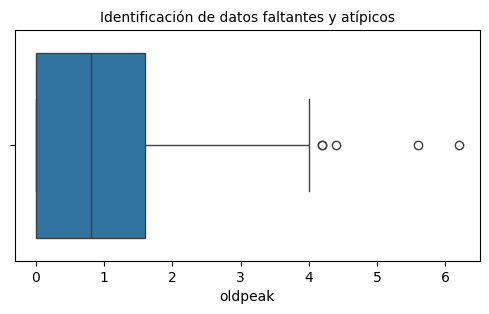

In [27]:
#identificacion datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['oldpeak'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

In [31]:
print ('procesar los datos limpiandolos, trtando datos faltantes y transformandolos segun corresponda')

procesar los datos limpiandolos, trtando datos faltantes y transformandolos segun corresponda


In [33]:
print("cantidad de Depresión del ST inducida por el ejercicio en relación con el reposo:", datos['oldpeak'].isin([0]).sum())
print("número de vasos principales (0-3) coloreados por fluoroscopia:", datos['ca'].isin([0]).sum())

cantidad de Depresión del ST inducida por el ejercicio en relación con el reposo: 96
número de vasos principales (0-3) coloreados por fluoroscopia: 174


In [39]:
#reemplazar todos los ceros con el valor medio (promedio) de la columna 
datos['oldpeak']=datos['oldpeak'].replace(0,datos['oldpeak'].mean())
datos['ca']=datos['ca'].replace(0,datos['ca'].mean())

In [41]:
#revision de datos faltantes
print("cantidad de Depresión del ST inducida por el ejercicio en relación con el reposo:", datos['oldpeak'].isin([0]).sum())
print("número de vasos principales (0-3) coloreados por fluoroscopia:", datos['ca'].isin([0]).sum())

cantidad de Depresión del ST inducida por el ejercicio en relación con el reposo: 0
número de vasos principales (0-3) coloreados por fluoroscopia: 0


In [45]:
#conteo de datos atipicos OLDPEAK
nivel_minimo=0
nivel_maximo=2
Total_Atipicos=((datos['oldpeak']<nivel_minimo)|(datos['oldpeak']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 50


In [47]:
#filtrar datos atipicos OLDPEAK
datos=datos[(datos['oldpeak']<nivel_maximo)&(datos['oldpeak']>nivel_minimo)]

In [49]:
#validar si se removieron los datos atipicos OLDPEAK
Total_Atipicos=((datos['oldpeak']<nivel_minimo)|(datos['oldpeak']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 0


In [51]:
#conteo de datos atipicos chol
nivel_minimo=200
nivel_maximo=500
Total_Atipicos=((datos['chol']<nivel_minimo)|(datos['chol']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 38


In [53]:
#filtrar datos atipicos chol
datos=datos[(datos['chol']<nivel_maximo)&(datos['chol']>nivel_minimo)]

In [55]:
#validar si se removieron los datos atipicos chol
Total_Atipicos=((datos['chol']<nivel_minimo)|(datos['chol']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 0


In [57]:
#conteo de datos atipicos trestbps
nivel_minimo=100
nivel_maximo=180
Total_Atipicos=((datos['trestbps']<nivel_minimo)|(datos['trestbps']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 2


In [59]:
#filtrar datos atipicos trestbps
datos=datos[(datos['trestbps']<nivel_maximo)&(datos['trestbps']>nivel_minimo)]

In [61]:
#validar si se removieron los datos atipicos trestbps
Total_Atipicos=((datos['trestbps']<nivel_minimo)|(datos['trestbps']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 0


In [63]:
#conteo de datos atipicos thalach
nivel_minimo=80
nivel_maximo=200
Total_Atipicos=((datos['thalach']<nivel_minimo)|(datos['thalach']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 2


In [65]:
#filtrar datos atipicos thalach
datos=datos[(datos['thalach']<nivel_maximo)&(datos['thalach']>nivel_minimo)]

In [67]:
#validar si se removieron los datos atipicos thalach
Total_Atipicos=((datos['thalach']<nivel_minimo)|(datos['thalach']>nivel_maximo)).sum()
print ("el total de datos atipicos es {}".format (Total_Atipicos))

el total de datos atipicos es 0


In [69]:
print ('SELECCIONAR LAS CARACTERISTICAS MAS RELEVANTES PARA ENTRENAR EL MODELO UTILIZANDO SELECCION DE CARACTERISTICAS')
print ('CARACTERISTICA DE INTERES:')
print ('ENFERMEDAD CARDIACA: SI LA PERSONA TIENE O NO ( 0 = NO 1= SI)')
print ('PREDECIR SI UNA PERSONA PUEDE TENER UNA ENFERMEDAD CARDIACA')

SELECCIONAR LAS CARACTERISTICAS MAS RELEVANTES PARA ENTRENAR EL MODELO UTILIZANDO SELECCION DE CARACTERISTICAS
CARACTERISTICA DE INTERES:
ENFERMEDAD CARDIACA: SI LA PERSONA TIENE O NO ( 0 = NO 1= SI)
PREDECIR SI UNA PERSONA PUEDE TENER UNA ENFERMEDAD CARDIACA


In [77]:
#total de personas con enfermedad cardiaca 
datos['condition'].value_counts()

condition
0    117
1     72
Name: count, dtype: int64

In [81]:
print ('DIVIR EL DATASETE EN TRAIIN Y TEST PARA EVALUAR CORRECTAMENTE EL MODELO')


DIVIR EL DATASETE EN TRAIIN Y TEST PARA EVALUAR CORRECTAMENTE EL MODELO


In [89]:
#porcentaje de datos para entrenamiento (train) 75% y para prueba (test) 25%
#se crean variables X y Y para almacenar la informacion

x=datos.drop ('condition', axis=1) #se cargan los datos de train sin los datos de la columna condition
y=datos['condition'] #se cargan los datos de train con los datos de la columna condition

#la funcion train_test_split crea una division de un conjunto de datos en dos bloques de entrenamiento y otro de prueba (train & test)

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, stratify=y, random_state=0)

In [85]:
print (x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0     69    1   0       160   234    1        2      131      0  0.100000   
149   41    0   2       112   268    0        2      172      1  1.055556   
17    51    1   0       125   213    0        2      125      1  1.400000   
132   47    1   2       138   257    0        2      156      0  1.055556   
241   55    1   3       160   289    0        2      145      1  0.800000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
167   66    0   3       178   228    1        0      165      1  1.000000   
202   60    1   3       140   293    0        2      170      0  1.200000   
145   42    0   2       120   209    0        0      173      0  1.055556   
190   62    0   3       150   244    0        0      154      1  1.400000   
247   54    1   3       110   206    0        2      108      1  1.055556   

     slope        ca  thal  
0        1  1.000000     0  
149      0  0.676

In [91]:
print (x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
274   46    1   3       120   249    0        2      144      0  0.800000   
29    62    1   1       128   208    1        2      140      0  1.055556   
278   45    1   3       115   260    0        2      185      0  1.055556   
42    55    0   1       132   342    0        0      166      0  1.200000   
209   59    0   3       174   249    0        0      143      1  1.055556   
48    52    1   1       128   205    1        0      184      0  1.055556   
259   51    0   3       130   305    0        0      142      1  1.200000   
43    54    1   1       108   309    0        0      156      0  1.055556   
143   43    1   2       130   315    0        0      162      0  1.900000   
66    41    1   1       110   235    0        0      153      0  1.055556   
133   47    1   2       108   243    0        0      152      0  1.055556   
195   61    0   3       130   330    0        2      169      0  1.055556   

In [93]:
print ('ENTRENAR EL MODELO CONFIGURANDO LOS DIFERENTES HIPERPARAMETROS')



ENTRENAR EL MODELO CONFIGURANDO LOS DIFERENTES HIPERPARAMETROS


In [95]:
#contruir el modelo de regresion logistica
modelo_regresion=LogisticRegression (solver="liblinear") # libreria para resoler problemas lineales de clasificacion y regresion
modelo_regresion.fit ( x_train, y_train)

#crea el modelo del prediccion
prediccion = modelo_regresion.predict(x_test) #predice los valores a partir del conjunto de datos de validacion

In [97]:
x_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
274,46,1,3,120,249,0,2,144,0,0.800000,0,0.676768,2
29,62,1,1,128,208,1,2,140,0,1.055556,0,0.676768,0
278,45,1,3,115,260,0,2,185,0,1.055556,0,0.676768,0
42,55,0,1,132,342,0,0,166,0,1.200000,0,0.676768,0
209,59,0,3,174,249,0,0,143,1,1.055556,1,0.676768,0
48,52,1,1,128,205,1,0,184,0,1.055556,0,0.676768,0
259,51,0,3,130,305,0,0,142,1,1.200000,1,0.676768,2
43,54,1,1,108,309,0,0,156,0,1.055556,0,0.676768,2
143,43,1,2,130,315,0,0,162,0,1.900000,0,1.000000,0
66,41,1,1,110,235,0,0,153,0,1.055556,0,0.676768,0


In [99]:
print (prediccion)

[1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1]


In [101]:
print ('EVALUAR ELDESEMPEÑO DEL MODELO EN EL CONJUNTO DE TEST CON METRICAS COMO PRECISION RECALL, F1-SCORE, ETC')

EVALUAR ELDESEMPEÑO DEL MODELO EN EL CONJUNTO DE TEST CON METRICAS COMO PRECISION RECALL, F1-SCORE, ETC


In [103]:
#desempeño del modelo de regresion

print (classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.91      0.56      0.69        18

    accuracy                           0.81        48
   macro avg       0.85      0.76      0.78        48
weighted avg       0.83      0.81      0.80        48



In [105]:
print ('REALIZAR LAS DIFERENTES GRAFICAS QUE PERMITAN IDENTIFICAR LOS RESULTADOS DEL MODELO')

REALIZAR LAS DIFERENTES GRAFICAS QUE PERMITAN IDENTIFICAR LOS RESULTADOS DEL MODELO


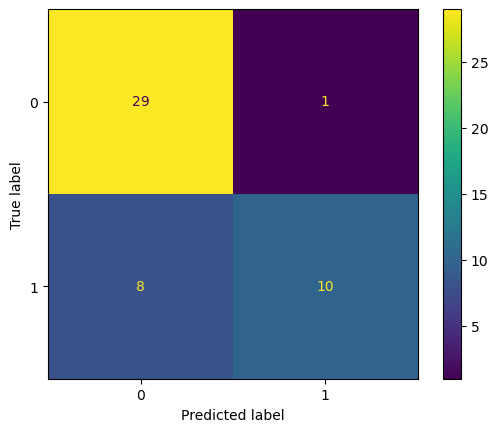

In [107]:
#matriz de confusion del modelo
cm=confusion_matrix(y_test, prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

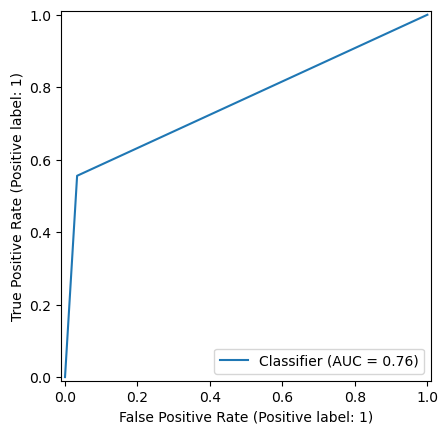

In [109]:
#curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediccion)
plt.show()

In [111]:
print ('INTERPRETAR, ANALIZAR Y DOCUMENTAR LOS RESULTADOS OBTENIDOS')

INTERPRETAR, ANALIZAR Y DOCUMENTAR LOS RESULTADOS OBTENIDOS


In [ ]:
#Precisión global (accuracy): El modelo acertó en el 81% de los casos (es decir, clasificó correctamente 39 de 48 personas).
#Clase 0 (personas sin enfermedad):
#Precisión: 0.78 → De todas las veces que el modelo dijo "no enfermo", acertó el 78%.
#Recall (sensibilidad): 0.97 → De todos los verdaderos "no enfermos", detectó correctamente el 97%.
#F1-score: 0.87 → Buena combinación entre precisión y recall.
#Clase 1 (personas con enfermedad):
#Precisión: 0.91 → Cuando el modelo dice "enfermo", acierta el 91%.
#Recall: 0.56 → Solo detectó correctamente al 56% de los realmente enfermos (¡bastante bajo!).
#F1-score: 0.69 → Regular desempeño en esta clase.
#El modelo tiene alta precisión (90.9%) y alta especificidad (96.7%), lo que indica que clasifica muy bien los negativos.
#Sin embargo, tiene un recall bajo (55.6%), lo que significa que no detecta bien los casos positivos (muchos falsos negativos).
#F1 Score moderado (0.689) sugiere un balance razonable, pero puede mejorarse en recall si se necesita más sensibilidad.
